# Clasificando rocas espaciales!

Bienvenidos a todos.

Este notebook está basado en gran parte en los contenidos del mini curso de Microsoft [clasificación de rocas espaciales mediante Python e inteligencia artificial](https://docs.microsoft.com/es-es/learn/paths/classify-space-rocks-artificial-intelligence-nasa/). Si te queda alguna duda que no pueda responder, o no esté disponible, puede ser consultada ahí.


Este notebook fué hecho por Zaid De Anda, de Future lab
![future lab](https://futurelab.mx/images/futurelab-landscape.png)



Empezaremos importando [este archivo](https://drive.google.com/file/d/1NN8amvYBu-VrIQ-w0Cgfiictm9G5CPF4/view?usp=sharing) a nuestra nube, abriendo el link y haciendo click en "añadir acceso directo"

#Importación de bibliotecas importantes


In [ ]:
#Biblioteca para graficar
import matplotlib.pyplot as plt
#Biblioteca para vectores/matrices en python
import numpy as np
#Biblioteca de IA
import torch
from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F
#Biblioteca para vision computacional
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
#Biblioteca para mostrar imagenes
from PIL import Image
#Biblioteca para montar nuestro google drive
from google.colab import drive, files
#Biblioteca para extraer los contenidos de un archivo comprimido
from zipfile import ZipFile

## Funciones _mágicas_

Estas dos funciones de abajo ayudan a que las gráficas/imágenes se vean más bonitas

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Ahora montaremos nuestra nube para acceder al archivo que ya importamos. Corremos la siguiente celda, en la nueva pestaña copiamos el código y lo pegamos aquí.

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Descomprimimos la carpeta que acabamos de añadir, que contiene el dataset
with ZipFile('/content/gdrive/MyDrive/Data.zip', 'r') as zipObj:
  zipObj.extractall('/content')

#Limpieza de los datos

Como los datos pueden venir en formas y tamaños (esta sobre todo) variados, necesitamos estandarizar un poco, así que de todas las imágenes, sacaremos un recorte de tamaño 224x224

In [ ]:
#Establecemos nuestra ruta de la base de datos
data_folder='/content/Data'

In [ ]:
#Creamos el transformador de datos, que nos ayudara a cortar las imagenes y transformarlas a tensor
transform_data= transforms.Compose([transforms.RandomResizedCrop(224),
                                           transforms.Resize(224),
                                           transforms.ToTensor()
                                          ])

In [ ]:
#Creamos la funcion para preparar los datos
def prepare_data(data_folder, test_portion=.2):
  #Le indicamos de donde obtendrá los datos de entrenamiento y de validación
  train_data = datasets.ImageFolder(, transform=)
  test_data = datasets.ImageFolder(, transform=)

  #Generamos una lista de índices de todas las imágenes
  indexes = list()
  #Y se parten los datos para entrenamiento y validación de acuerdo a la variable test_portion
  punto_partida = int()
  #Se reparten aleatoriamente
  np.random.shuffle(indexes)

  #Se generan las listas de los índices de entrenamiento y validación
  train_indexes = indexes[]
  test_indexes = indexes[]

  #Se genera un sampler, que muestrea elementos al azar de una lista de índices, sin repetición
  train_sampler = SubsetRandomSampler()
  test_sampler = SubsetRandomSampler()

  #Combina el dataset de arriba con el sampler, y regresa un iterable sobre la base de datos
  train_loader = DataLoader(, sampler=, batch_size=)
  test_loader = DataLoader(, sampler=, batch_size=)
  
  return train_loader, test_loader

In [ ]:
#Se carga la base de datos
train_loader, test_loader = prepare_data()

In [ ]:
#Revisamos las categorias que tiene la base de datos
print(train_loader.dataset.classes)

['Basalt', 'Highland']


In [ ]:
#Ahora creamos una función que nos regresa un grupo de imágenes, de manera similar a como se hacia arriba
def get_images(batch_size):
  data = datasets.ImageFolder(, transform = )
  classes = data.classes
  indexes = list()
  np.random.shuffle(indexes)
  split_indexes = indexes[]
  sampler = SubsetRandomSampler()
  loader = DataLoader(, sampler=, batch_size=)

  #Creamos un iterador para iterar sobre las imágenes en el dataset de imágenes de prueba
  data_iterator = iter(loader)

  #Regresa las imagenes y etiquetas del iterador
  images,labels = data_iterator.next()
  return images,labels

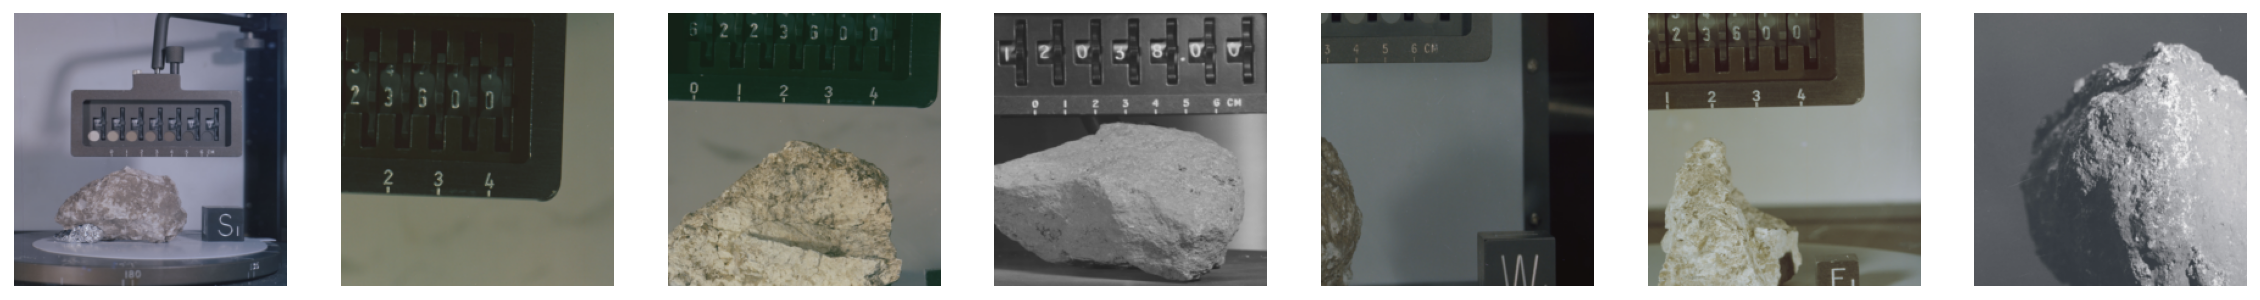

In [ ]:
#Mostramos 7 imagenes, el numero se puede cambiar
images,labels = get_images(7)

#Convertimos el arreglo de pixeles a una imagen
to_image = transforms.ToPILImage()
fig=plt.figure(figsize=(20,20))

#Regresamos una lista de todas las clases en los datos de entrenamiento
classes = train_loader.dataset.classes

#Dibuja las imagenes en un gráfico
i=0
for limage in images:
    image = to_image(limage)
    i+=1
    sub = fig.add_subplot(1, len(images), i)
    plt.axis('off')
    plt.imshow(image)

#Muestra todas las imagenes
plt.show()

#Creación y entrenamiento de la red neuronal

In [ ]:
#Seleccionamos como dispositivo la GPU si hay disponible, de lo contrario, se escoge la CPU
dispositivo = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#Se carga un modelo ResNet50 pre entrenado
modelo = 

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


In [ ]:
#Se construyen todas las neuronas
for parametro in modelo.parameters():
     parametro.requires_grad = False

#Se ensamblan las neuronas en la red neuronal, 
#La primera capa es lineal con 2048 parametros de entrada y 512 de salida
modelo.fc = nn.Sequential(,
                          #Funcion de activacion Relu
                               ,
                          #Hacemos el chasquido de Thanos y eliminamos el 20% de conexiones entre particulas
                               ,
                          #Añadimos una capa lineal con 512 entrada y 2 de salida (solo tenemos dos clases)
                               ,
                          #Aplicamos el logaritmo de la funcion softmax (logsoftmax)de cada parametro de salida para tener mejores resultados de salida
                               )

#Se escoge como funcion de error la probabilidad logaritmica negativa de perdida
criterio = 
#Se escoge como optimizador adam con un learning rate de 0.003
optimizador = optim.Adam(modelo.fc.parameters(), lr=)

#Se añade la red neuronal al dispositivo
modelo.to()

print("Listo calisto")

Listo calisto


In [ ]:
# Numero inicial de epocas, y cada cuántas iteraciones se evaluará el modelo
epochs = 5
print_every = 5

# Inicializar las variables de pérdida
running_loss = 0
train_losses, test_losses = [], []

# Contador del número de pasos
steps = 0

# Ciclo de entrenamiento
for epoch in range(epochs):

   # Contador para cada epoca
   epoch += 1

   # Se cargan todas las entradas y etiquetas en el set de entrenamiento
   for inputs, labels in train_loader:

      # Contador de cada paso de entrenamiento
      steps += 1
      print('Training step ', steps)

      # Se cargan las entradas y las etiquetas en el dispositivo
      inputs, labels = inputs.to(dispositivo), labels.to(dispositivo)

      # Los gradientes se igualan a cero para evitar acumulaciones a traves de las iteraciones de entrenamiento
      optimizador.zero_grad()

      # Se pasan las imagenes a través del modelo, y se regresan las probabilidades logaritmicas de cada etiqueta
      logps = modelo.forward(inputs)

      # Se corren las probabilidades logaritmicas a traves del criterio para obtener la grafica de salida
      loss = criterio(logps, labels)

      # Se usa la grafica de salida para calcular los nuevos gradientes
      loss.backward()

      # Se actualizan los parametros con base en los nuevos gradientes
      optimizador.step()

      # Se añade el valor actual de perdida al valor total
      running_loss += loss.item()

      # Cada n pasos, se evalua el modelo
      if steps % print_every == 0:

         # Se inicializa el valor de perdida y precision
         test_loss = 0
         accuracy = 0

         # Se empieza la evaluacion del modelo
         modelo.eval()
        
         # Aumentamos la precision de la prediccion sin actualizar los gradientes
         with torch.no_grad():
         
         # Esta siguiente parte se conoce como back propagation en terminos generales
            # Cargamos todas las imagenes de entrada y etiquetas del cargador de datos de prueba 
            for inputs, labels in test_loader:
              
               # Cargamos las entradas y etiquetas al dispositivo seleccionado
               inputs, labels = inputs.to(dispositivo), labels.to(dispositivo)

               # Pasamos las imagenes a traves del modelo, y regresamos las probabilidades logaritmicas de cada etiqueta
               logps = modelo.forward(inputs)

               # Corremos las probabilidades logaritmicas a traves del criterio para obtener la salida
               batch_loss = criterio(logps, labels)

               # Añadimos el numero de perdida actual al numero de perdida total para el batch de prueba
               test_loss += batch_loss.item()

               # Regresamos un nuevo tensor con las probabilidades
               ps = torch.exp(logps)

               # Regresamos la probabilidad mas grande y clase del nuevo tensor junto con una nueva dimension
               top_p, top_class = ps.topk(1, dim=1)

               # Cambia la forma del tensor para igualar la forma que la clase inicial
               equals = top_class == labels.view(*top_class.shape)

               # Calcula la precision y se la añade al conteo de precision actual de el batch de prueba
               accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

         # Añade las perdidas de entrenamiento y validacion
         train_losses.append(running_loss/len(train_loader))
         test_losses.append(test_loss/len(test_loader))  

         # Muestra la precision de la prediccion con 3 cifras significativas
         print(f"\n     Epoch {epoch}/{epochs}: "
               f"Train loss: {running_loss/print_every:.3f}.. "
               f"Test loss: {test_loss/len(test_loader):.3f}.. "
               f"Test accuracy: {accuracy/len(test_loader):.3f}\n")

         # Entrena el modelo
         running_loss = 0
         modelo.train()

         # Despues de N etapas de entrenamiento, se pasa el nuevo batch
         # Se realiza un break aqui en caso de que el loader de entrenamiento tenga datos faltantes
         break

Training step  1
Training step  2
Training step  3
Training step  4
Training step  5

     Epoch 1/5: Train loss: 0.411.. Test loss: 0.417.. Test accuracy: 0.854

Training step  6
Training step  7
Training step  8
Training step  9
Training step  10

     Epoch 2/5: Train loss: 0.500.. Test loss: 0.633.. Test accuracy: 0.688

Training step  11
Training step  12
Training step  13
Training step  14
Training step  15

     Epoch 3/5: Train loss: 0.431.. Test loss: 0.197.. Test accuracy: 0.952

Training step  16
Training step  17
Training step  18
Training step  19
Training step  20

     Epoch 4/5: Train loss: 0.307.. Test loss: 0.193.. Test accuracy: 0.958

Training step  21
Training step  22
Training step  23
Training step  24
Training step  25

     Epoch 5/5: Train loss: 0.336.. Test loss: 0.202.. Test accuracy: 0.935



In [ ]:
# Mostramos la precision del modelo
print(accuracy/len(test_loader))

0.9345238010088602


In [ ]:
# Guardamos el modelo en nuestra nube
torch.save(modelo, '/content/gdrive/MyDrive/ISP2021.pth')

# Prediccion de imagenes

In [ ]:
# Cargamos en modelo en caso de que no lo tengamos entrenado, pero si en la nube
modelo=torch.load('/content/gdrive/MyDrive/ISP2021.pth')

In [ ]:
# Creamos una funcion para predecir la categoria de una imagen
def predict_image(image):
    # Convertimos la imagen a tensor
    image_tensor = transform_data(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    # Introducimos este tensor como entrada a la red
    input = Variable(image_tensor)
    input = input.to(dispositivo)
    output = modelo(input)
    # Obtenemos su categoria
    index = output.data.cpu().numpy().argmax()
    return index

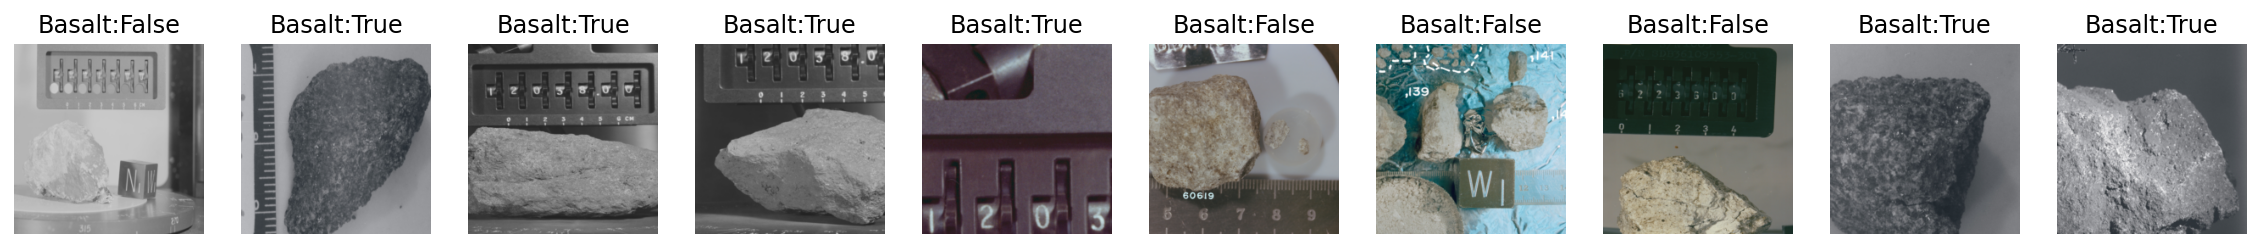

In [ ]:
# Obtenemos N imagenes aleatorias y las mostramos en una grafica con sus etiquetas
N=10
to_pil = transforms.ToPILImage()
images, labels = get_images(N)
fig=plt.figure(figsize=(20,10))

# Cargamos todas las clases desde el loader de entrenamiento
classes=train_loader.dataset.classes

# Itermaos sobre las N imagenes para predecir su clase
for ii in :

    # Predecimos la clase de cada imagen
    image = to_pil()
    index = predict_image()

    # Añadimos la clase a la grafica para mostrar si la prediccion es verdadera
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    sub.set_title(str(classes[index]) + ":" + str(res))
    plt.axis('off')
    plt.imshow(image)

# Vuelve a mostrar la grafica con las etiquetas predichas abajo de las imagenes
plt.show()

# Fuentes y recursos útiles:

3B1B serie sobre las redes neuronales (explica mucho todo lo que tiene que ver con arquitectura, entrenamiento, backpropagation, etc):
https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi